<a href="https://colab.research.google.com/github/fhenri/FinanceAnalysis/blob/main/TickerComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance matplotlib pandas

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
def ticker_performance(ticker='^GSPC', capital=10000, start_date='1970-01-01', end_date=None):
    # Set the end date to today if not provided
    end_date = end_date or datetime.today().strftime('%Y-%m-%d')

    # Fetch historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print(f"No data found for ticker {ticker}")
        return

    # Calculate returns
    data['Daily Return'] = data['Adj Close'].pct_change()
    data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

    # Calculate final metrics
    total_return = data['Cumulative Return'].iloc[-1] - 1
    years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365.25
    annualized_return = (1 + total_return) ** (1 / years) - 1
    final_capital = capital * data['Cumulative Return'].iloc[-1]

    # Create a table with metrics
    metrics = pd.DataFrame({
        'Metric': ['Total Return', 'Annualized Return', 'Final Capital'],
        'Value': [f"{total_return:.2%}", f"{annualized_return:.2%}", f"${final_capital:,.2f}"]
    })

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label=f'{ticker} Price')
    plt.title(f'{ticker} Performance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the table
    print(metrics)


[*********************100%***********************]  1 of 1 completed


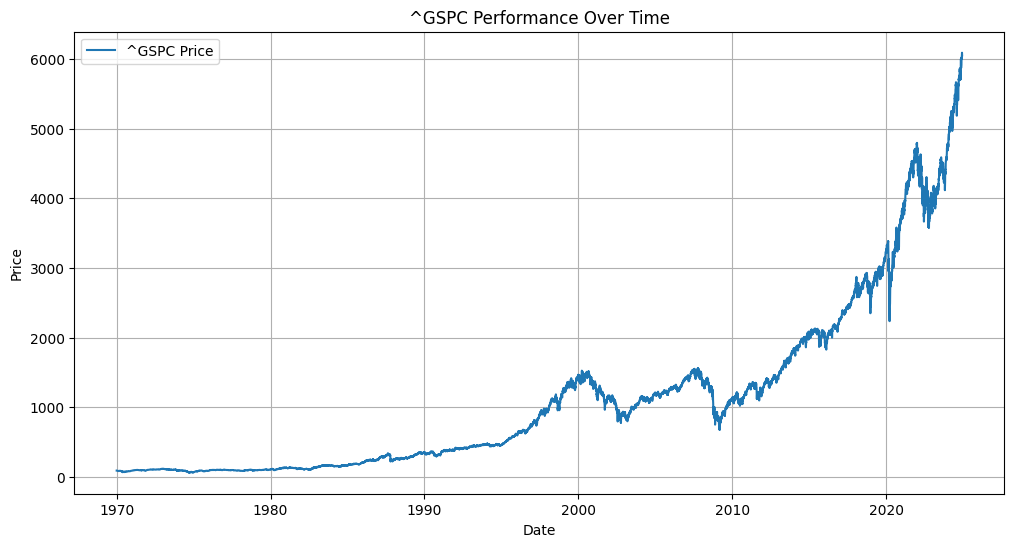

[*********************100%***********************]  1 of 1 completed

              Metric        Value
0       Total Return     6408.44%
1  Annualized Return        7.90%
2      Final Capital  $650,844.10


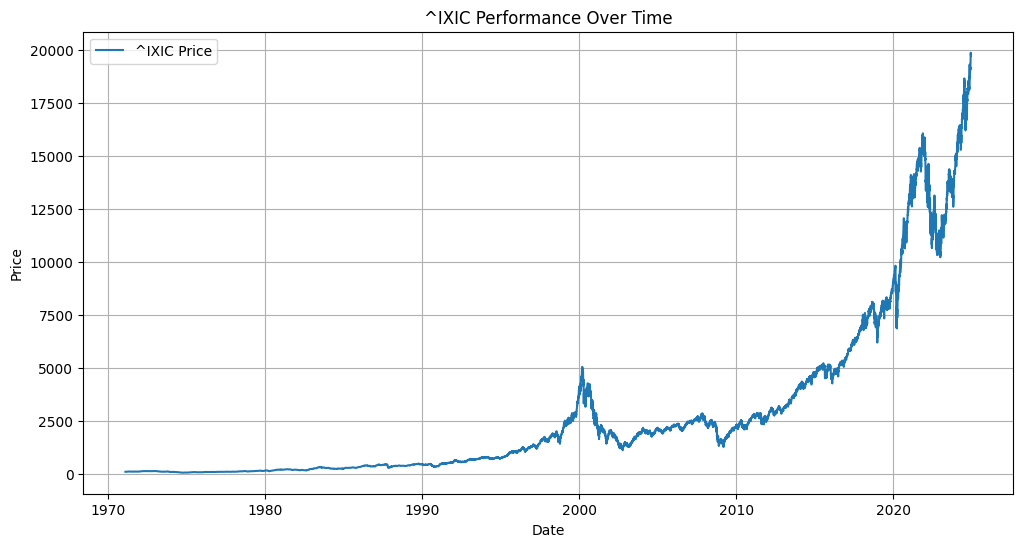

              Metric          Value
0       Total Return      19636.69%
1  Annualized Return         10.10%
2      Final Capital  $1,973,668.95


In [15]:
# SP500 : ^GSPC
# Nasdaq Composite : ^IXIC
tickers = ['^GSPC', '^IXIC']

for ticker in tickers:
    ticker_performance(ticker, start_date='1970-01-01')


In [19]:
def compare_tickers_performance(ticker_list, capital=100000, start_date='1970-01-01', end_date=None):
    # Set the end date to today if not provided
    end_date = end_date or datetime.today().strftime('%Y-%m-%d')

    # Dictionary to store results
    performance_data = {}
    adjusted_start_date = None

    # Fetch data for each ticker
    for ticker in ticker_list:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"No data found for ticker {ticker}")
            continue

        # Update the adjusted start date to the latest available start date
        ticker_start_date = data.index[0]
        if adjusted_start_date is None or ticker_start_date > adjusted_start_date:
            adjusted_start_date = ticker_start_date

        # Store data
        performance_data[ticker] = data

    if not performance_data:
        print("No valid data for any tickers.")
        return

    # Truncate data to the adjusted start date
    for ticker in ticker_list:
        if ticker in performance_data:
            performance_data[ticker] = performance_data[ticker][performance_data[ticker].index >= adjusted_start_date]

    # Calculate metrics and plot cumulative returns
    metrics = []
    plt.figure(figsize=(12, 6))
    for ticker, data in performance_data.items():
        # Calculate returns
        data['Daily Return'] = data['Adj Close'].pct_change()
        data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

        # Calculate final metrics
        total_return = data['Cumulative Return'].iloc[-1] - 1
        years = (pd.to_datetime(end_date) - adjusted_start_date).days / 365.25
        annualized_return = (1 + total_return) ** (1 / years) - 1
        final_capital = capital * data['Cumulative Return'].iloc[-1]

        metrics.append({
            'Ticker': ticker,
            'Total Return': f"{total_return:.2%}",
            'Annualized Return': f"{annualized_return:.2%}",
            'Final Capital': f"${final_capital:,.2f}"
        })

        # Plot cumulative return
        plt.plot(data['Cumulative Return'], label=ticker)

    # Graph formatting
    plt.title("Ticker Performance Comparison")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid()
    plt.show()

    # Create and print metrics table
    metrics_df = pd.DataFrame(metrics)
    print("\n", metrics_df)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


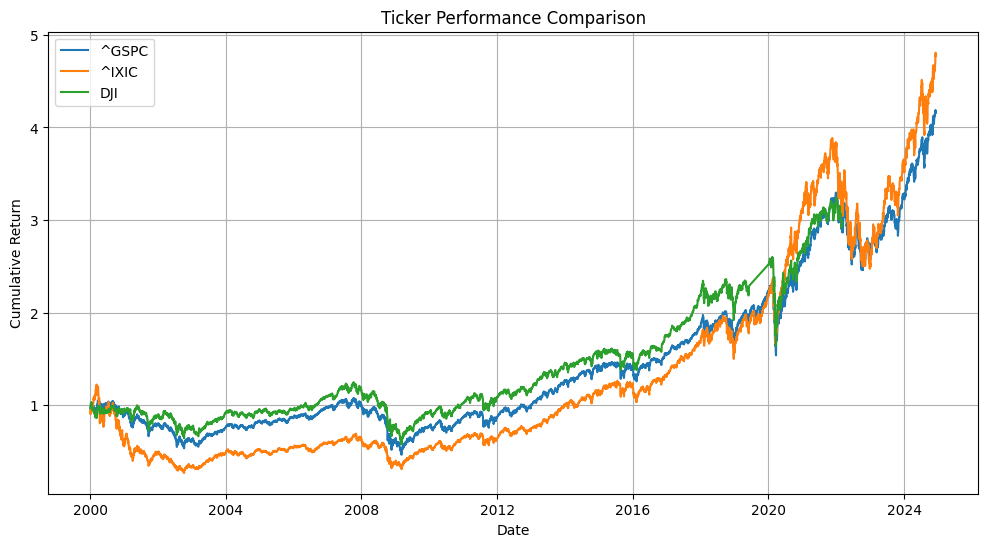

[*********************100%***********************]  1 of 1 completed


   Ticker Total Return Annualized Return Final Capital
0  ^GSPC      315.94%             5.88%   $415,940.56
1  ^IXIC      377.75%             6.47%   $477,752.92
2    DJI      198.40%             4.48%   $298,404.59



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


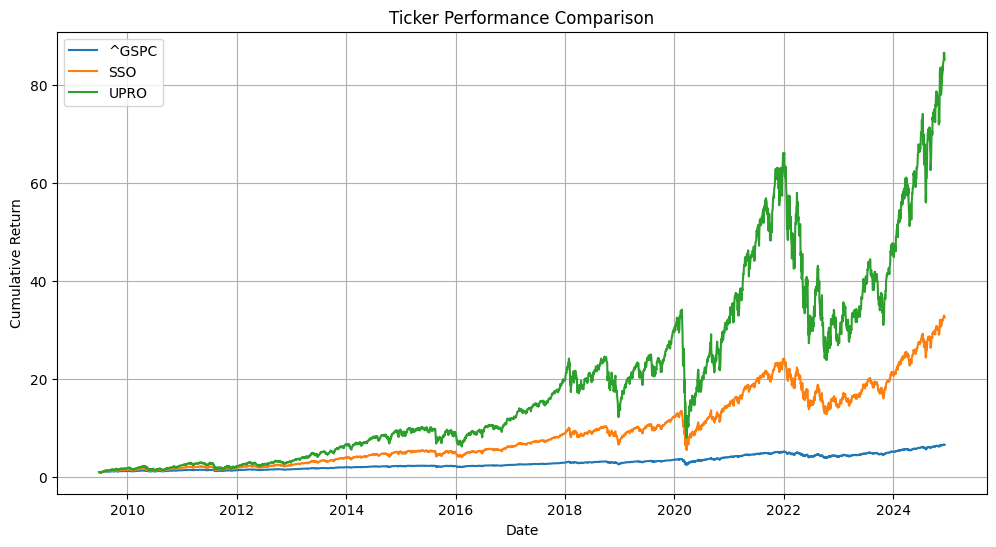

[*********************100%***********************]  1 of 1 completed


   Ticker Total Return Annualized Return  Final Capital
0  ^GSPC      557.73%            12.96%    $657,732.60
1    SSO     3155.95%            25.27%  $3,255,951.53
2   UPRO     8411.73%            33.30%  $8,511,725.38



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


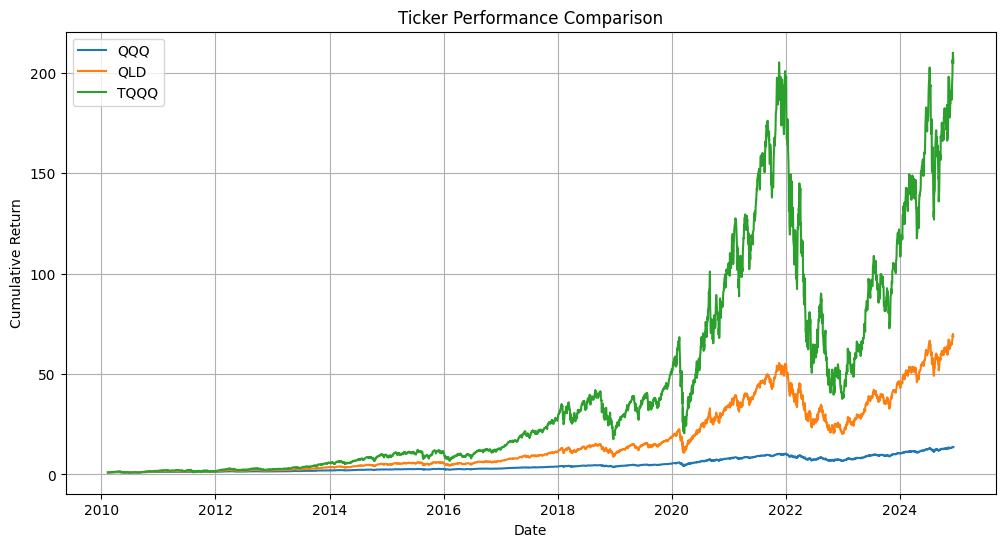

[*********************100%***********************]  1 of 1 completed


   Ticker Total Return Annualized Return   Final Capital
0    QQQ     1267.28%            19.29%   $1,367,284.14
1    QLD     6789.40%            33.03%   $6,889,403.50
2   TQQQ    20419.67%            43.20%  $20,519,669.99



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


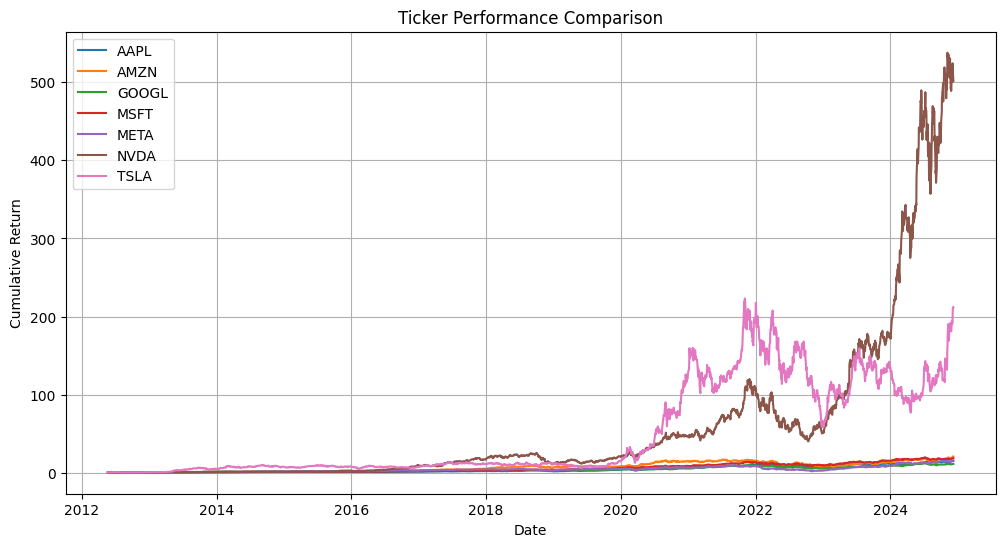

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


   Ticker Total Return Annualized Return   Final Capital
0   AAPL     1444.25%            24.34%   $1,544,253.44
1   AMZN     2014.47%            27.49%   $2,114,472.70
2  GOOGL     1071.42%            21.64%   $1,171,417.13
3   MSFT     1806.31%            26.44%   $1,906,312.16
4   META     1509.78%            24.75%   $1,609,776.13
5   NVDA    50019.19%            64.02%  $50,119,190.27
6   TSLA    21114.99%            53.17%  $21,214,990.22



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


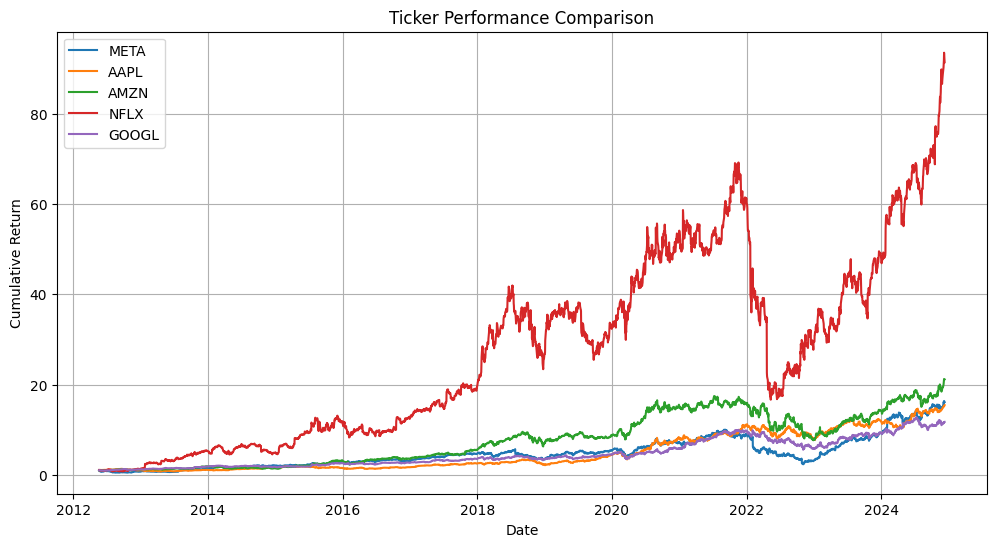


   Ticker Total Return Annualized Return  Final Capital
0   META     1509.78%            24.75%  $1,609,776.13
1   AAPL     1444.25%            24.34%  $1,544,253.44
2   AMZN     2014.47%            27.49%  $2,114,472.70
3   NFLX     9042.12%            43.25%  $9,142,124.21
4  GOOGL     1071.42%            21.64%  $1,171,417.13


In [27]:
ticker_lists=[
    ['^GSPC', '^IXIC', 'DJI'],
    ['^GSPC', 'SSO', 'UPRO'],
    ['QQQ', 'QLD', 'TQQQ'],
    ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'META', 'NVDA', 'TSLA'], # magnificent 7
    ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL'], # FAANG
]

for ticker_list in ticker_lists:
  compare_tickers_performance(
      ticker_list,
      capital=100000,
      start_date='2000-01-01',
      #end_date='2010-01-01',
  )